# Localizar los conectores clave

In [2]:
'''lista de usuarios, cada uno representado por un dict
que contiene su id (que es un número) y su name (que, en
una de esas fabulosas conjunciones planetarias, concuerda
con su id)'''
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]

In [3]:
'''los datos de “amistad” (friendship), están representados como
una lista de pares de identificadores'''
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


<img src="../assets/figura1.1.png" alt="La red de DataSciencester" width="400"/>


In [8]:
# Inicializar el dict con una lista vacía para cada id de usuario:
friendships = {user["id"]: [] for user in users}
# Y pasar por todos los pares de amistad para llenarlo:
for i, j in friendship_pairs:
  friendships[i].append(j) # Añadir j como un amigo del usuario i
  friendships[j].append(i) # Añadir i como un amigo del usuario j

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [ ]:
def number_of_friends(user):
  '''Cómo cuántos amigos tiene cada usuario?'''
  user_id = user["id"]
  friend_ids = friendships[user_id]
  return len(friend_ids)

total_connections = sum(number_of_friends(user)
for user in users) # 24
total_connections

24

In [ ]:
'''Cuántos usuarios hay? y cuántas conexiones de amistad hay en promedio?'''
num_users = len(users)                            # longitud de la lista de usuarios
avg_connections = total_connections / num_users   # 24 / 10 == 2,4
'''Resultados'''
num_users, avg_connections

(10, 2.4)

In [17]:
'''la mayor cantidad de amigos'''
# Crea una lista (user_id, number_of_friends).
num_friends_by_id = [
  (user["id"], number_of_friends(user))
  for user in users
  ]

num_friends_by_id.sort(             # Ordena la lista
key=lambda id_and_friends:
  id_and_friends[1],                # por num_friends
  reverse=True                      # del mayor al menor
  )
# Cada par es (user_id, num_friends):
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]
num_friends_by_id


[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]


<img src="../assets/figura1.2.png" alt="La red de DataSciencester" width="400"/>


# Científicos de datos que podría conocer

In [21]:
'''Sugeridor “Científicos de datos que podría conocer”.'''
'''(Sugerir que los usuarios podrían conocer a los amigos
de sus amigos)'''
def foaf_ids_bad(user):
  """foaf is short for "friend of a friend" """
  return [foaf_id
    for friend_id in friendships[user["id"]]
    for foaf_id in friendships[friend_id]]

foaf_ids_bad(users[0])      #Hero
# [0, 2, 3, 0, 1, 3]

'''Incluye el usuario 0 dos veces, ya que Hero es de hecho amigo de sus dos
amigos. Incluye los usuarios 1 y 2, aunque ambos ya son amigos de Hero. Y
también incluye el usuario 3 dos veces, ya que se puede llegar hasta Chi a
través de dos amigos distintos:'''


[0, 2, 3, 0, 1, 3]

In [22]:
'''contador de amigos mutuos. Y exclusión de
gente ya conocida por el usuario'''
from collections import Counter           # no cargado inicialmente

def friends_of_friends(user):
  user_id = user["id"]
  return Counter(
    foaf_id
    for friend_id in friendships[user_id] # Para cada uno de mis amigos,
    for foaf_id in friendships[friend_id] # encuentra sus amigos
    if foaf_id != user_id                 # que no son yo
    and foaf_id not in                    # y no son mis amigos
    friendships[user_id]

  )

print(friends_of_friends(users[3]))       # Contador({"id": "Nro_amigos_mutuos"})
# Contador({0: 2, 5: 1})

Counter({0: 2, 5: 1})


In [24]:
'''conociendo amigos con intereses comunes'''
interests = [
  (0, "Hadoop"),          (0, "Big Data"),                (0, "HBase"),         (0, "Java"),
  (0, "Spark"),           (0, "Storm"),                   (0, "Cassandra"),
  (1, "NoSQL"),           (1, "MongoDB"),                 (1, "Cassandra"),     (1, "HBase"),
  (1, "Postgres"),        (2, "Python"),                  (2, "scikit-learn"),  (2, "scipy"),
  (2, "numpy"),           (2, "statsmodels"),             (2, "pandas"),        (3, "R"),     (3, "Python"),
  (3, "statistics"),      (3, "regression"),              (3, "probability"),
  (4, "machine learning"),(4, "regression"),              (4, "decision trees"),
  (4, "libsvm"),          (5, "Python"),                  (5, "R"),             (5, "Java"),  (5, "C++"),
  (5, "Haskell"),         (5, "programming languages"),   (6, "statistics"),
  (6, "probability"),     (6, "mathematics"),             (6, "theory"),
  (7, "machine learning"),(7, "scikit-learn"),            (7, "Mahout"),
  (7, "neural networks"), (8, "neural networks"),         (8, "deep learning"),
  (8, "Big Data"),        (8, "artificial intelligence"), (9, "Hadoop"),
  (9, "Java"),            (9, "MapReduce"),               (9, "Big Data")
]

In [25]:
def data_scientists_who_like(target_interest):
  """Encuentra los ids de todos los usuarios a quienes tengan el mismo interés."""
  return [
      user_id
      for user_id, user_interest in interests
      if user_interest == target_interest
    ]

data_scientists_who_like("Python") # [2, 3, 5, 7]


[2, 3, 5]

In [28]:
'''Si tenemos muchos usuarios e intereses (o si simplemente
queremos hacer muchas búsquedas), es probablemente mejor que nos
dediquemos a crear un índice de intereses a usuarios'''
from collections import defaultdict
# Las claves son intereses, los valores son listas de user_ids con ese interés
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

'Y otro de usuarios a intereses:'
# Las claves son user_ids, los valores son listas de intereses para ese user_id.
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
  interests_by_user_id[user_id].append(interest)

'''Ahora podemos encontrar los usuarios que comparten un interés
con un usuario dado, sin tener que recorrer toda la lista de intereses.'''
def most_common_interests_with(user):
  return Counter(
    interested_user_id
    for interest in interests_by_user_id[user["id"]]
    for interested_user_id in user_ids_by_interest[interest]
    if interested_user_id != user["id"]
  )

print(most_common_interests_with(users[0])) # Hero

Counter({9: 3, 1: 2, 8: 1, 5: 1})


# Salarios y experiencia

Matplotlib is building the font cache; this may take a moment.


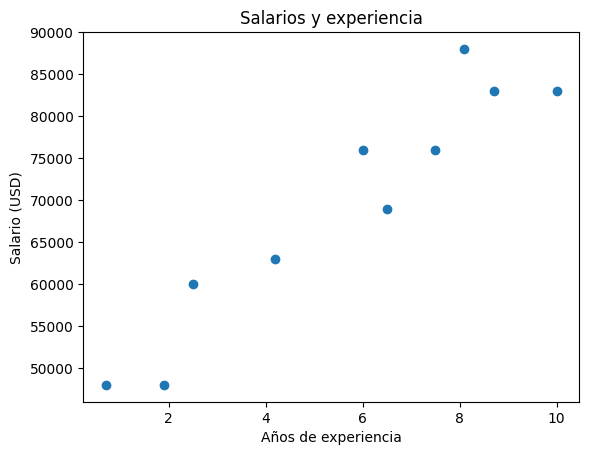

In [29]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)
                        ]
# trazar los datos en un grafico de dispersión
import matplotlib.pyplot as plt
import numpy as np
salaries, tenures = zip(*salaries_and_tenures)  # Desempaquetar las tuplas
plt.scatter(tenures, salaries)
plt.title("Salarios y experiencia")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario (USD)")
plt.show()


In [39]:
# Las claves son años, los valores son listas de los salarios por antigüedad.
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)
  # Las claves son años, cada valor es el salario medio para dicha antigüedad.
  average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
  }
print('promedio de salarios por antigüedad:')
average_salary_by_tenure


promedio de salarios por antigüedad:


{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [40]:
'Poniendolos por años de antigüedad en un bucket'
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

'Agrupando los salarios por bucket de antigüedad'
# Las claves son buckets de años de antigüedad, los valores son listas de salarios para bucket
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)
print('Salarios por bucket de antigüedad:')
salary_by_tenure_bucket

Salarios por bucket de antigüedad:


defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [42]:
'''Calculando el salario medio para cada grupo'''
# Las claves son buckets de años de antigüedad, los valores son el salario medio para bucket
average_salary_by_bucket = {
tenure_bucket: sum(salaries) / len(salaries)
for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

# Cuentas de pago

In [43]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

predict_paid_or_unpaid(2.5)  # "paid"

'paid'

# Temas de interés

In [44]:
interests

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'NoSQL'),
 (1, 'MongoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'artificial intelligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

In [48]:
'''Mostrar datos sobre los temas que más interesan a
los usuarios encontrando los intereses más populares'''

'''Una manera sencilla (aunque no especialmente apasionante) de encontrar
los intereses más populares es contando las palabras:
  1.  Ponemos en minúsculas todos los hobbies (ya que habrá usuarios que
      los pongan en mayúscula y otros en minúscula).
  2. Los dividimos en palabras.
  3. Contamos los resultados.
'''
words_and_counts = Counter(word
for user, interest in interests
for word in interest.lower().split())
words_and_counts.most_common()

[('big', 3),
 ('data', 3),
 ('java', 3),
 ('python', 3),
 ('learning', 3),
 ('hadoop', 2),
 ('hbase', 2),
 ('cassandra', 2),
 ('scikit-learn', 2),
 ('r', 2),
 ('statistics', 2),
 ('regression', 2),
 ('probability', 2),
 ('machine', 2),
 ('neural', 2),
 ('networks', 2),
 ('spark', 1),
 ('storm', 1),
 ('nosql', 1),
 ('mongodb', 1),
 ('postgres', 1),
 ('scipy', 1),
 ('numpy', 1),
 ('statsmodels', 1),
 ('pandas', 1),
 ('decision', 1),
 ('trees', 1),
 ('libsvm', 1),
 ('c++', 1),
 ('haskell', 1),
 ('programming', 1),
 ('languages', 1),
 ('mathematics', 1),
 ('theory', 1),
 ('mahout', 1),
 ('deep', 1),
 ('artificial', 1),
 ('intelligence', 1),
 ('mapreduce', 1)]

In [49]:
for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
mapreduce 1
